<a href="https://colab.research.google.com/github/ChengHung-Hsu/algorithm1/blob/master/%E5%BE%90%E8%AA%A0%E9%B4%BB_109%E6%BC%94%E7%AE%97%E6%B3%95%E6%9C%9F%E6%9C%AB%E8%80%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**109演算法期末考**

*   每題25分共125分
*   1/13 23:59前完成不扣分;
*   11/14 11:59前減5分;11/14 23:59前減10分；1/15 11:59前減15分;
*   最遲需於1/15 11:59前繳交!
*   請在解題想法區塊寫上解題的想法/思路、所使用的演算法及其原因(最好有推導過程)
*   程式碼需可以執行，且依照題目說明的輸入輸出規範
*   檔名改成 XXX_109演算法期末考.ipynb







第一題：
請從一個整數Array中，找出第K大的元素

Exp：輸入: {5,3,8,2,9,4,6} 
          K=2
    輸出: Ans:8


解題想法：

In [ ]:
#程式

第二題： 找零錢問題
目前有 1,2,5,10 四種面值的硬幣，請算出有總共有幾種方式湊N元?


Exp：輸入N=32，輸出：各種湊出32元的組合



解題想法：

In [ ]:
#程式
total=32
money=[10,5,2,1]
results=[]
for i in range(int(total/money[0])+1):
    result=[i]
    for ii in range(int(total/money[1])+1):
        result = [ii]
        for iii in range(int(total / money[2]) + 1):
            result = [iii]
            for iiii in range(int(total / money[3]) + 1):
                result = [iiii]
              for iiiii in range(int(total / money[4]) + 1):               
                if i*money[0]+ii*money[1]+iii*money[2]+iiii*money[3]==total:
                  result.append(i)
                  result.append(ii)
                  result.append(iii)
                  result.append(iiii) 

print(results)

IndentationError: ignored

第三題： 有個小偷到3C用品店偷東⻄,假設他的背包的負重最多可達10公斤,他希望在背包中裝入負重範圍內可得之總價物品,小偷的背包應該怎麼裝才能帶走最有價值的商品?

* 每個商品只有拿走/留著這兩種狀況
* 每個商品不能被切割（如拿1/3個）
* 每個商品也不能被拿超過一次
* 請輸出所選擇的產品之編號，單價，總價，背包總重量


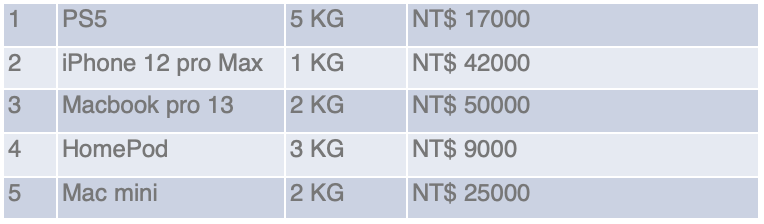








解題想法：
用動態規劃(DP)，先給定一個二維的陣列(一個判斷價值，另一判斷重量)，在負重限制內，以價值最高的優先去取，先取50000(Mackbook pro 13)，然後依序為42000(iPhone 12 pro Max),25000(Mac mini),17000(PS5)，這時發現背包已經達到最大負荷，中止程式


In [ ]:
#程式
import numpy as np
def BackPack():
    Total = 10               #背包負重，函式執行完判斷用
    num = 5                 #3C總數
    v = [5,1,2,3,2]             #重量
    price = [17000,42000,50000,9000,25000]  #價格
    sum = np.zeros((num+1,Total+1)) # 二維數據互相比較，用陣列創造一個二维的空間
    
    for ele in range(num+1):     # 3C數量, 背包總負重W
        for W in range(Total+1): # 背包負重(每一次)
            if(ele==0):     # 若沒有裝入3C,sum=0
              sum[ele][W]=0
            else:
              sum[ele][W]=sum[ele-1][W]
            if(ele>0 and W>=v[ele-1]): # ele>0,且背包可放下3C
              sum[ele][W]=max(sum[ele-1][W],sum[ele-1][W-v[ele-1]]+price[ele-1])

    print("DP最大金額:",sum[num][Total])
    
    # 紀錄最後裝入背包的3C，並印出pack[]
    BackPack=np.zeros((num))
    volume = Total
    for ele in range(num,-1,-1):  #由後往前（循環）
      if(sum[ele][volume]>sum[ele-1][volume]):  # 如果加入後一個比前一個價值還要高,就會優先選擇後一個
        BackPack[ele-1]=1
        volume=volume-v[ele-1]

    print("3C欄位:[PS5. iPhone 12 pro Max. Mackbook pro 13. HomePod. Mac mini]")
    print("3C單價:[$17000. $42000. $50000. $9000. $25000]")
    print("3C選擇:",BackPack)
    print("背包總重:",Total)
 
if __name__=="__main__":
  BackPack()

DP最大金額: 134000.0
3C欄位:[PS5. iPhone 12 pro Max. Mackbook pro 13. HomePod. Mac mini]
3C單價:[$17000. $42000. $50000. $9000. $25000]
3C選擇: [1. 1. 1. 0. 1.]
背包總重: 10


第四題：請以深度優先搜尋(DFS)、廣度優先搜尋法(BFS)走訪有向圖中的所有節點，並印出兩種搜尋法的走訪順序

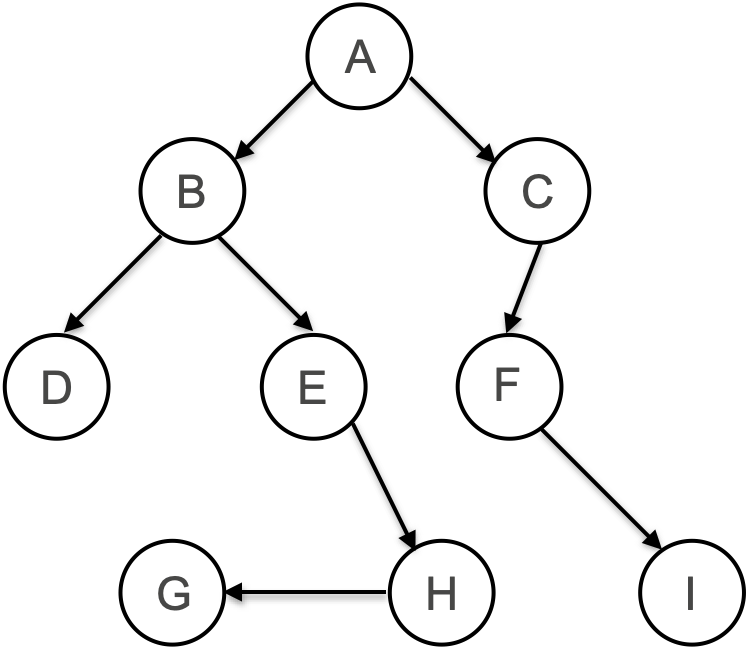

解題想法：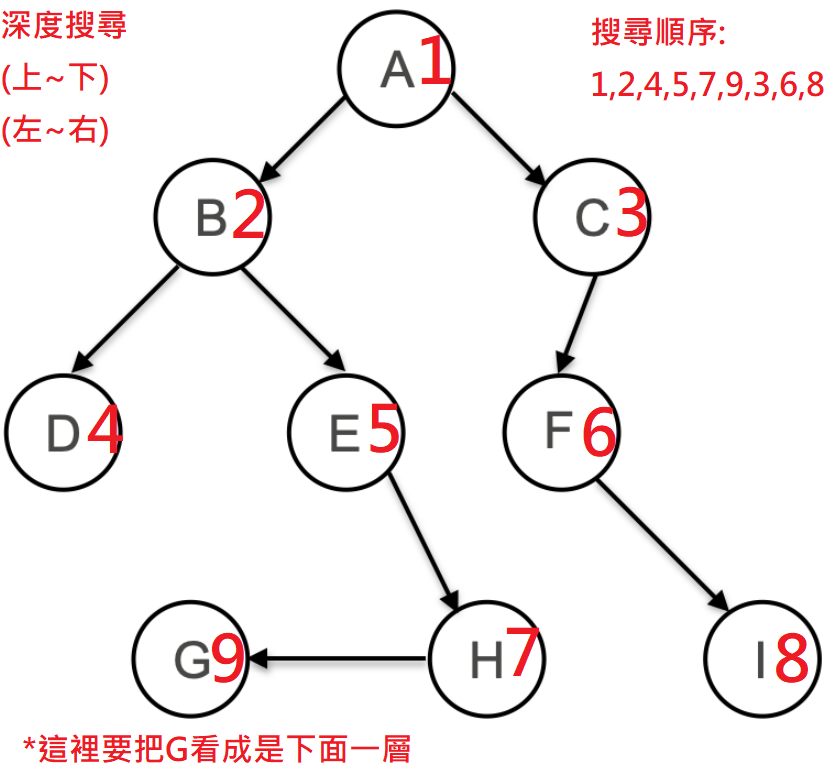
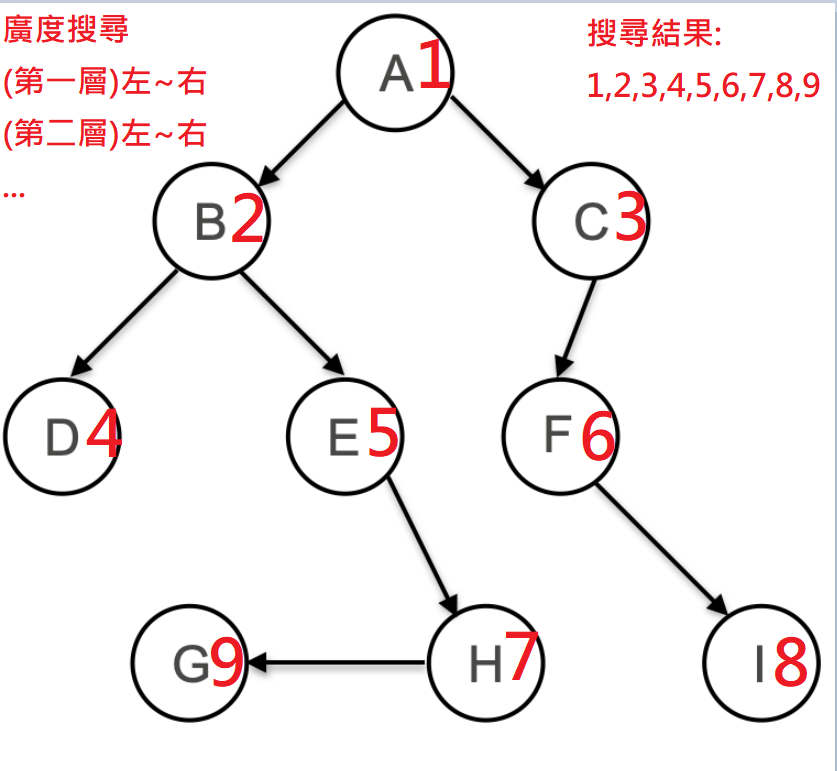

In [9]:
#程式
def enqueue(a, o):
    a.insert(0, o)

def dequeue(a):
    return a.pop()

g = {                   #g(graph):被搜尋的path
    '1': {'n':['2','3'], 'v':0},    #n(neighbor):['左','右'], v(visited):判斷拜訪紀錄
    '2': {'n':['4','5'], 'v':0},
    '3': {'n':['6'], 'v':0},
    '4': {'n':[], 'v':0},
    '5': {'n':['7'], 'v':0},
    '6': {'n':['8'], 'v':0},
    '7': {'n':['9'], 'v':0},
    '8': {'n':[], 'v':0},
    '9': {'n':[], 'v':0}
   }

def init(g):                    #設定visited為0
    for i in g:
        g[i]['v'] = 0

def dfs(g, node):                 #深度優先搜尋
    if g[node]['v']!=0:             #如果已訪問過，就不再訪問
        return
    print(node, '=> ', end = '')       #否則,印出節點
    g[node]['v'] = 1               #並設定為"已訪問"
    neighbors = g[node]['n']           #取出鄰居節點['左'，'右']
    for n in neighbors:             #對於每個鄰居
        dfs(g, n)               #逐一進行訪問

queue=['1']                   #BFS 用的 queue, 起始點為 1。

def bfs(g, q):                 #廣度優先搜尋
    if len(q)==0:               #如果queue已空，則返回。
        return
    node = dequeue(q)             #否則,取出queue的第一個節點
    if g[node]['v'] == 0:           #如果該節點尚未拜訪過
        g[node]['v'] = 1          #標示為已拜訪
    else:                     #否則(已訪問過)
        return                #不繼續搜尋,直接返回
    print(node, '=> ', end = '')     #印出節點
    neighbors = g[node]['n']         #取出鄰居
    for n in neighbors:            #對於每個鄰居
        if not g[n]['v']:          #假如該鄰居還沒被拜訪過
            enqueue(q, n)         #就放入queue中
    bfs(g, q)

print("dfs對應英文:A => B => D => E => H => G => C => F => I")
print('dfs:', end = '')
init(g)
dfs(g, '1')                     #呼叫深度優先搜尋。
print('')

print("bfs對應英文:A => B => C => D => E => F => G => H => I")
print('bfs:', end = '')
init(g)
bfs(g, queue)                    #呼叫廣度優先搜尋。
print('')



dfs對應英文:A => B => D => E => H => G => C => F => I
dfs:1 => 2 => 4 => 5 => 7 => 9 => 3 => 6 => 8 => 
bfs對應英文:A => B => C => D => E => F => G => H => I
bfs:1 => 2 => 3 => 4 => 5 => 6 => 7 => 8 => 9 => 


第五題： 請用 Kruskal或Prim 演算法(2選1)找出下圖的最小生成樹，並依照順序寫出加入的每一個邊

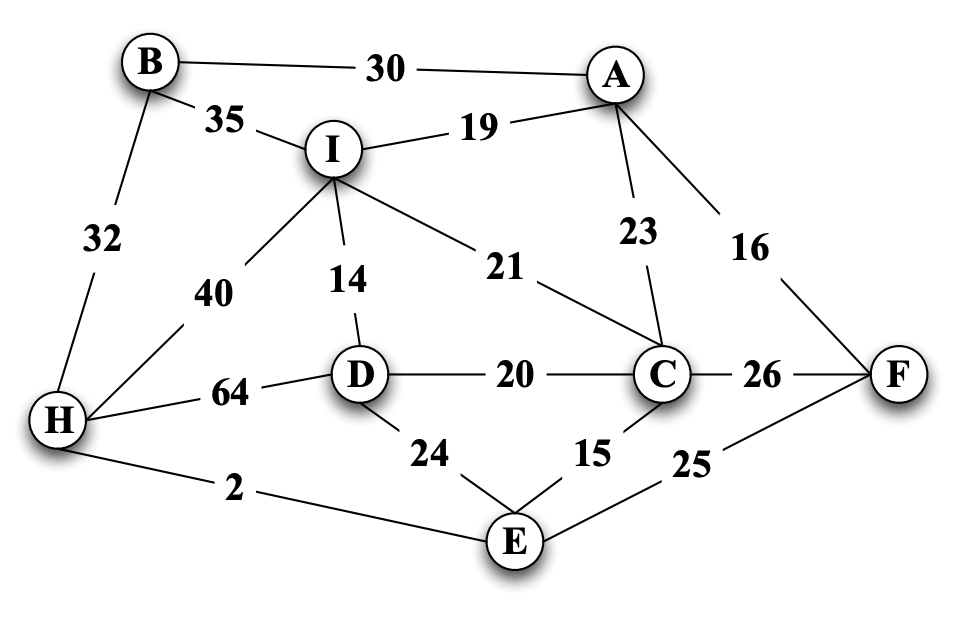

解題想法：

In [ ]:
#程式
class DisjointSet(dict):
    '''不相交集'''

    def __init__(self, dict):
        pass

    def add(self, item):
        self[item] = item

    def find(self, item):
        if self[item] != item:
            self[item] = self.find(self[item])
        return self[item]

    def unionset(self, item1, item2):
        self[item2] = self[item1]


def Kruskal_1(nodes, edges):
    '''基於不相交集實現Kruskal演算法'''
    forest = DisjointSet(nodes)
    MST = []
    for item in nodes:
        print(item)
        forest.add(item)
    edges = sorted(edges, key=lambda element: element[2])
    num_sides = len(nodes)-1  # 最小生成樹的邊數等於頂點數減一
    for e in edges:
        node1, node2, _ = e
        parent1 = forest.find(node1)
        parent2 = forest.find(node2)
        if parent1 != parent2:
            MST.append(e)
            num_sides -= 1
            if num_sides == 0:
                return MST
            else:
                forest.unionset(parent1, parent2)
    pass


def Kruskal(nodes, edges):
    ''' Kruskal 無向圖生成最小生成樹 '''
    all_nodes = nodes  # set(nodes)
    used_nodes = set()
    MST = []
    edges = sorted(edges, key=lambda element: element[2], reverse=True)
    # 對所有的邊按權重升序排列
    while used_nodes != all_nodes and edges:
        element = edges.pop(-1)
        if element[0] in used_nodes and element[1] in used_nodes:
            continue
        MST.append(element)
        used_nodes.update(element[:2])
        # print(used_nodes)
    return MST


def main():
    nodes = set(list('ABCDEFGHI'))
    edges = [("A", "B", 30), ("A", "C", 23), ("A", "F", 16), ("A", "I", 19),
             ("B", "I", 35), ("B", "H", 32),
             ("C", "D",), ("C", "E", 15), ("C", "F", 26), ("C", "I", 21),
             ("D", "I", 14), ("D", "E", 24), ("D", "H", 64),
             ("E", "F", 25), ("E", "H", 2),
             ("H", "I", 40)]
    print("\n\nThe undirected graph is :", edges)
    print("\n\nThe minimum spanning tree by Kruskal is : ")
    print(Kruskal_1(nodes, edges))


if __name__ == '__main__':
    main()



The undirected graph is : [('A', 'B', 30), ('A', 'C', 23), ('A', 'F', 16), ('A', 'I', 19), ('B', 'I', 35), ('B', 'H', 32), ('C', 'D'), ('C', 'E', 15), ('C', 'F', 26), ('C', 'I', 21), ('D', 'I', 14), ('D', 'E', 24), ('D', 'H', 64), ('E', 'F', 25), ('E', 'H', 2), ('H', 'I', 40)]


The minimum spanning tree by Kruskal is : 
C
I
A
G
H
D
E
F
B


IndexError: ignored